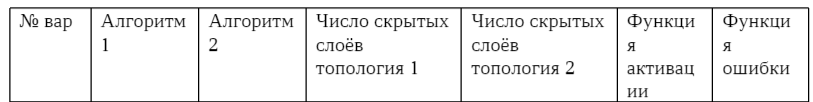
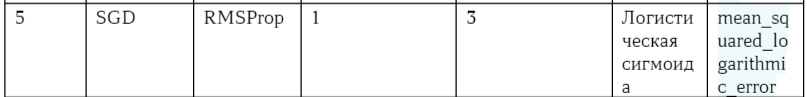


In [22]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense
import keras
from keras.optimizers import SGD

In [23]:
# 1 пункт
wine = datasets.load_wine(as_frame=True)
table = pd.DataFrame(wine.data,columns=wine.feature_names)
table['target']=wine.target
table

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [24]:
x = wine.data
y = np.ravel(wine.target)

In [25]:
# 2 и 3 пункт
model_SGD_1_hidden = tf.keras.Sequential()
model_SGD_1_hidden.add(layers.Input(shape=(13,)))
model_SGD_1_hidden.add(layers.Dropout(0.25))
model_SGD_1_hidden.add(layers.Dense(64,activation='sigmoid'))
model_SGD_1_hidden.add(layers.Dense(3,activation='softmax'))
model_SGD_1_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy'])

model_RMSPROP_1_hidden = tf.keras.Sequential()
model_RMSPROP_1_hidden.add(layers.Input(shape=(13,)))
model_RMSPROP_1_hidden.add(layers.Dropout(0.25))
model_RMSPROP_1_hidden.add(layers.Dense(64,activation='sigmoid'))
model_RMSPROP_1_hidden.add(layers.Dense(3,activation='softmax'))
model_RMSPROP_1_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop',metrics=['accuracy'])

model_SGD_3_hidden = tf.keras.Sequential()
model_SGD_3_hidden.add(layers.Input(shape=(13,)))
model_SGD_3_hidden.add(layers.Dense(64,activation='sigmoid'))
model_SGD_3_hidden.add(layers.Dropout(0.25))
model_SGD_3_hidden.add(layers.Dense(64,activation='sigmoid'))
model_SGD_3_hidden.add(layers.Dense(64,activation='sigmoid'))
model_SGD_3_hidden.add(layers.Dense(3,activation='softmax'))
model_SGD_3_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd',metrics=['accuracy'])

model_RMSPROP_3_hidden = tf.keras.Sequential()
model_RMSPROP_3_hidden.add(layers.Input(shape=(13,)))
model_RMSPROP_3_hidden.add(layers.Dense(64,activation='sigmoid'))
model_RMSPROP_3_hidden.add(layers.Dropout(0.25))
model_RMSPROP_3_hidden.add(layers.Dense(64,activation='sigmoid'))
model_RMSPROP_3_hidden.add(layers.Dense(64,activation='sigmoid'))
model_RMSPROP_3_hidden.add(layers.Dense(3,activation='softmax'))
model_RMSPROP_3_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop',metrics=['accuracy'])

In [26]:
# 6 пункт
a=9
train_accuracy1=np.empty(a)
test_accuracy1=np.empty(a)
train_accuracy2=np.empty(a)
test_accuracy2=np.empty(a)
train_accuracy3=np.empty(a)
test_accuracy3=np.empty(a)
train_accuracy4=np.empty(a)
test_accuracy4=np.empty(a)

train_loss1=np.empty(a)
test_loss1=np.empty(a)
train_loss2=np.empty(a)
test_loss2=np.empty(a)
train_loss3=np.empty(a)
test_loss3=np.empty(a)
train_loss4=np.empty(a)
test_loss4=np.empty(a)
testSize=0
for i in range(0,9): 
    testSize+=0.1
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=testSize,  shuffle=True)
    scaler=StandardScaler().fit(x_train)
    x_train=scaler.transform(x_train)
    x_test=scaler.transform(x_test)
    y_train=tf.keras.utils.to_categorical(y_train,3)
    y_test=tf.keras.utils.to_categorical(y_test,3)
    
    model_SGD_1_hidden.fit(x_train,y_train,epochs=10, batch_size=1, verbose=0)
    train_loss1[i],train_accuracy1[i]=model_SGD_1_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)

    
    model_SGD_1_hidden.fit(x_test,y_test,epochs=10, batch_size=1, verbose=0)
    test_loss1[i],test_accuracy1[i]=model_SGD_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
    
    
    
    model_RMSPROP_1_hidden.fit(x_train,y_train,epochs=10, batch_size=1, verbose=0)
    train_loss2[i],train_accuracy2[i]=model_RMSPROP_1_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_RMSPROP_1_hidden.fit(x_test,y_test,epochs=10, batch_size=1, verbose=0)
    test_loss2[i],test_accuracy2[i]=model_RMSPROP_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
    
    
    
    model_SGD_3_hidden.fit(x_train,y_train,epochs=10, batch_size=1, verbose=0)
    train_loss3[i], train_accuracy3[i]=model_SGD_3_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_SGD_3_hidden.fit(x_test,y_test,epochs=10, batch_size=1, verbose=0)
    test_loss3[i],test_accuracy3[i]=model_SGD_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)      
       
               
    model_RMSPROP_3_hidden.fit(x_train,y_train,epochs=10, batch_size=1, verbose=0)
    train_loss4[i],train_accuracy4[i]=model_RMSPROP_3_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_RMSPROP_3_hidden.fit(x_test,y_test,epochs=10, batch_size=1, verbose=0)
    test_loss4[i],test_accuracy4[i]=model_RMSPROP_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)

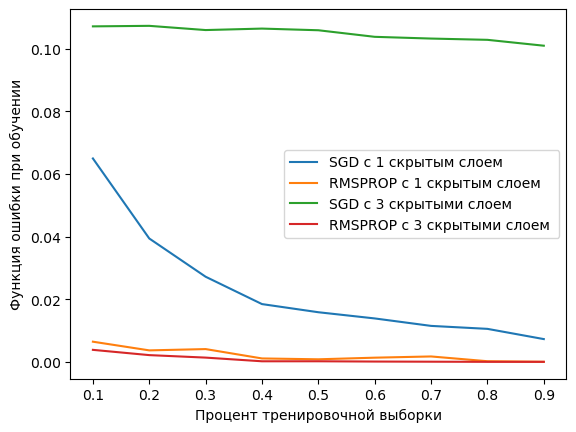

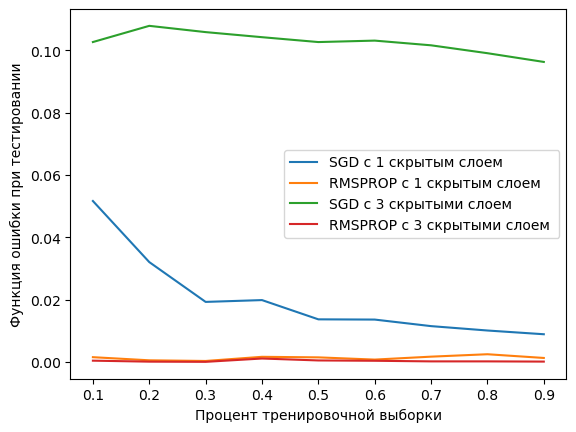

In [27]:
xaxis = ["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7","0.8","0.9"]
plt.plot(xaxis,train_loss1)
plt.plot(xaxis,train_loss2)
plt.plot(xaxis,train_loss3)
plt.plot(xaxis,train_loss4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Процент тренировочной выборки')
plt.ylabel('Функция ошибки при обучении')
plt.show()

plt.plot(xaxis,test_loss1)
plt.plot(xaxis,test_loss2)
plt.plot(xaxis,test_loss3)
plt.plot(xaxis,test_loss4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Процент тренировочной выборки')
plt.ylabel('Функция ошибки при тестировании')
plt.show()

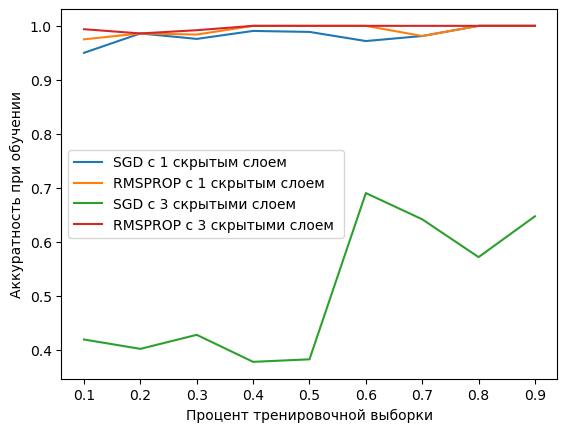

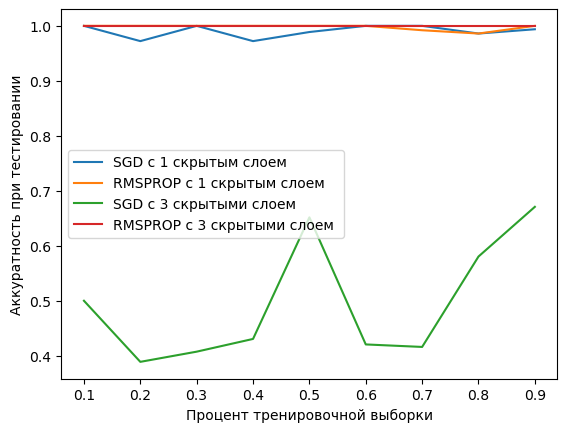

In [28]:
plt.plot(xaxis,train_accuracy1)
plt.plot(xaxis,train_accuracy2)
plt.plot(xaxis,train_accuracy3)
plt.plot(xaxis,train_accuracy4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Процент тренировочной выборки')
plt.ylabel('Аккуратность при обучении')
plt.show()

plt.plot(xaxis,test_accuracy1)
plt.plot(xaxis,test_accuracy2)
plt.plot(xaxis,test_accuracy3)
plt.plot(xaxis,test_accuracy4)
plt.legend (( 'SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Процент тренировочной выборки')
plt.ylabel('Аккуратность при тестировании')
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,  shuffle=True)
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
y_train=tf.keras.utils.to_categorical(y_train,3)
y_test=tf.keras.utils.to_categorical(y_test,3)

In [30]:
# 7 пункт
a=11
train_accuracy1=np.empty(a)
test_accuracy1=np.empty(a)
train_accuracy2=np.empty(a)
test_accuracy2=np.empty(a)
train_accuracy3=np.empty(a)
test_accuracy3=np.empty(a)
train_accuracy4=np.empty(a)
test_accuracy4=np.empty(a)

train_loss1=np.empty(a)
test_loss1=np.empty(a)
train_loss2=np.empty(a)
test_loss2=np.empty(a)
train_loss3=np.empty(a)
test_loss3=np.empty(a)
train_loss4=np.empty(a)
test_loss4=np.empty(a)
for i in range(0,11):
    model_SGD_1_hidden.fit(x_train,y_train,epochs=5*i, batch_size=1, verbose=0)
    train_loss1[i],train_accuracy1[i]=model_SGD_1_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)

    
    model_SGD_1_hidden.fit(x_test,y_test,epochs=5*i, batch_size=1, verbose=0)
    test_loss1[i],test_accuracy1[i]=model_SGD_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
    
    
    
    model_RMSPROP_1_hidden.fit(x_train,y_train,epochs=5*i, batch_size=1, verbose=0)
    train_loss2[i],train_accuracy2[i]=model_RMSPROP_1_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_RMSPROP_1_hidden.fit(x_test,y_test,epochs=5*i, batch_size=1, verbose=0)
    test_loss2[i],test_accuracy2[i]=model_RMSPROP_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
    
    
    
    model_SGD_3_hidden.fit(x_train,y_train,epochs=5*i, batch_size=1, verbose=0)
    train_loss3[i], train_accuracy3[i]=model_SGD_3_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_SGD_3_hidden.fit(x_test,y_test,epochs=5*i, batch_size=1, verbose=0)
    test_loss3[i],test_accuracy3[i]=model_SGD_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)      
       
               
    model_RMSPROP_3_hidden.fit(x_train,y_train,epochs=5*i, batch_size=1, verbose=0)
    train_loss4[i],train_accuracy4[i]=model_RMSPROP_3_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_RMSPROP_3_hidden.fit(x_test,y_test,epochs=5*i, batch_size=1, verbose=0)
    test_loss4[i],test_accuracy4[i]=model_RMSPROP_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)

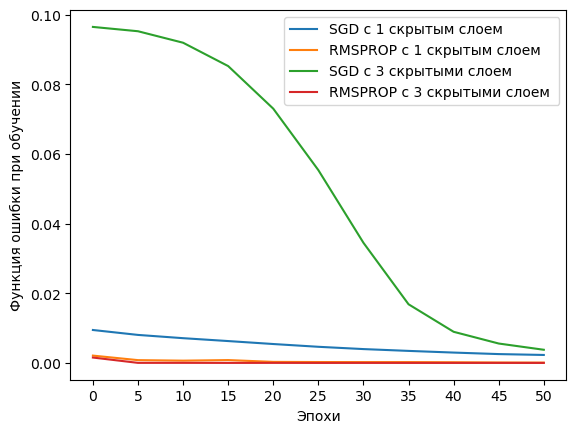

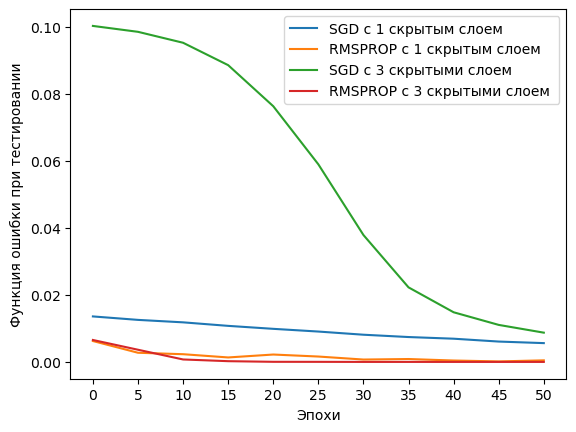

In [31]:
# 7 пункт
xaxis = ["0","5","10","15", "20", "25", "30", "35", "40", "45", "50"]
plt.plot(xaxis,train_loss1)
plt.plot(xaxis,train_loss2)
plt.plot(xaxis,train_loss3)
plt.plot(xaxis,train_loss4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Эпохи')
plt.ylabel('Функция ошибки при обучении')
plt.show()

plt.plot(xaxis,test_loss1)
plt.plot(xaxis,test_loss2)
plt.plot(xaxis,test_loss3)
plt.plot(xaxis,test_loss4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем '))
plt.xlabel('Эпохи')
plt.ylabel('Функция ошибки при тестировании')
plt.show()

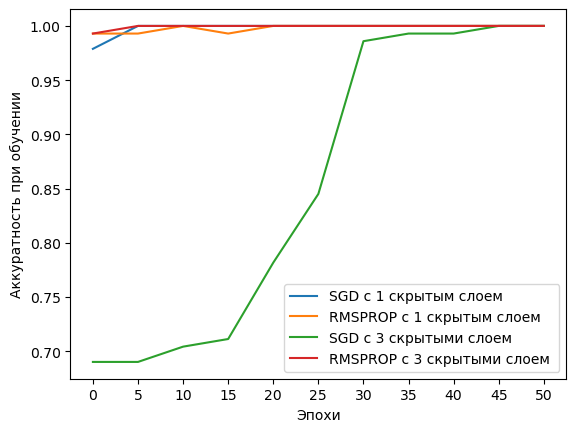

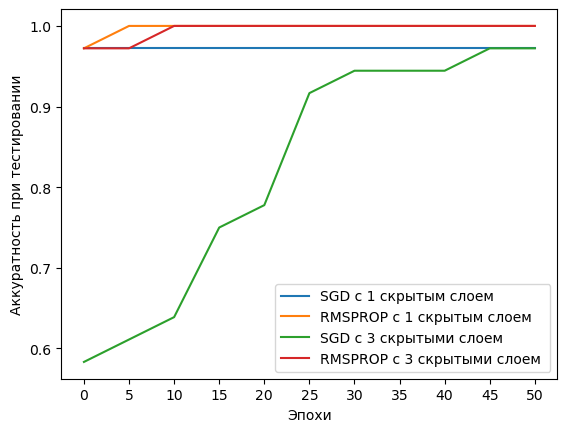

In [32]:
# 7 пункт
plt.plot(xaxis,train_accuracy1)
plt.plot(xaxis,train_accuracy2)
plt.plot(xaxis,train_accuracy3)
plt.plot(xaxis,train_accuracy4)
plt.legend (( 'SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Эпохи')
plt.ylabel('Аккуратность при обучении')
plt.show()

plt.plot(xaxis,test_accuracy1)
plt.plot(xaxis,test_accuracy2)
plt.plot(xaxis,test_accuracy3)
plt.plot(xaxis,test_accuracy4)
plt.legend (( 'SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем '))
plt.xlabel('Эпохи')
plt.ylabel('Аккуратность при тестировании')
plt.show()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
y_train=tf.keras.utils.to_categorical(y_train,3)
y_test=tf.keras.utils.to_categorical(y_test,3)
model_SGD_1_hidden.fit(x_train,y_train,epochs=20, batch_size=1, verbose=0)
model_RMSPROP_1_hidden.fit(x_train,y_train,epochs=20, batch_size=1, verbose=0)
model_SGD_3_hidden.fit(x_train,y_train,epochs=20, batch_size=1, verbose=0)
model_RMSPROP_3_hidden.fit(x_train,y_train,epochs=20, batch_size=1, verbose=0)    
y_test = np.argmax(y_test, axis = 1)
predict1 = model_SGD_1_hidden.predict(x_test)
predict1 = np.argmax(predict1, axis =1)
predict2 = model_RMSPROP_1_hidden.predict(x_test)
predict2 = np.argmax(predict2, axis =1)
predict3 = model_SGD_3_hidden.predict(x_test)
predict3 = np.argmax(predict3, axis =1)
predict4 = model_RMSPROP_3_hidden.predict(x_test)
predict4 = np.argmax(predict4, axis =1)
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict1,pos_label=2)
fpr2, tpr2, thresholds2= roc_curve(y_test, predict2,pos_label=2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict3,pos_label=2)
fpr4, tpr4, thresholds4 = roc_curve(y_test, predict4,pos_label=2)

2/2 [==============================] - 0s 0s/step


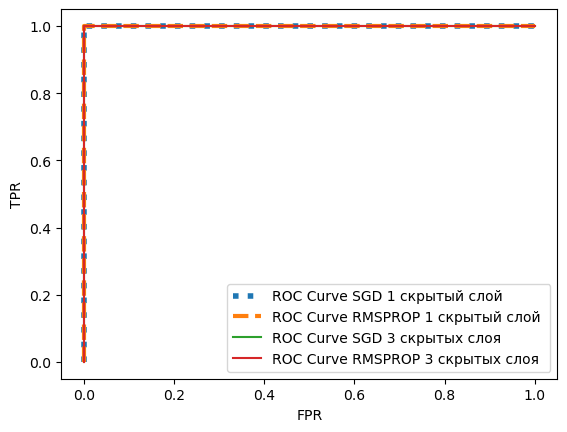

In [34]:
plt.plot(fpr1,tpr1, label="ROC Curve SGD 1 скрытый слой",linewidth= 4, linestyle="dotted")
plt.plot(fpr2,tpr2, label="ROC Curve RMSPROP 1 скрытый слой ", linestyle='--', linewidth=3)
plt.plot(fpr3,tpr3, label="ROC Curve SGD 3 скрытых слоя")
plt.plot(fpr4,tpr4, label="ROC Curve RMSPROP 3 скрытых слоя")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [35]:
print("Площадь под AUC кривой для модели SGD с 1 скрытым слоем = " + str(auc(fpr1,tpr1)))
print("Площадь под AUC кривой для модели RMSPROP с 1 скрытым слоем = "+str(auc(fpr2,tpr2)))
print("Площадь под AUC кривой для модели SGD с 3 скрытыми слоями = " + str(auc(fpr3,tpr3)))
print("Площадь под AUC кривой для модели RMSPROP с 3 скрытыми слоями = "+str(auc(fpr4,tpr4)))

Площадь под AUC кривой для модели SGD с 1 скрытым слоем = 1.0
Площадь под AUC кривой для модели RMSPROP с 1 скрытым слоем = 1.0
Площадь под AUC кривой для модели SGD с 3 скрытыми слоями = 1.0
Площадь под AUC кривой для модели RMSPROP с 3 скрытыми слоями = 1.0


Матрица для SGD с 1 скрытым слоем


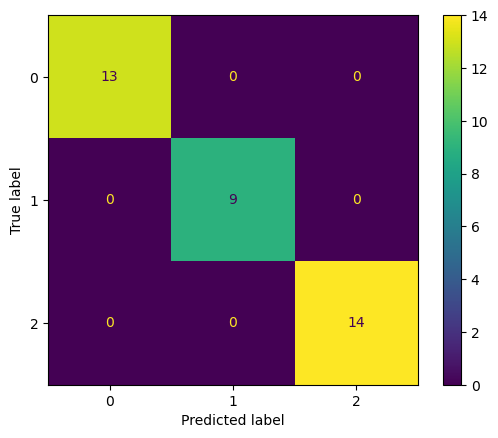

Матрица для RMSPROP с 1 скрытым слоем


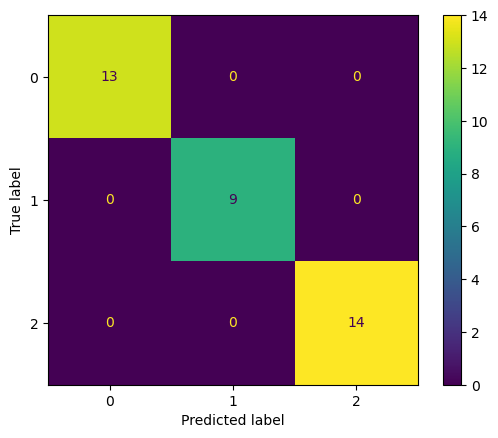

Матрица для SGD с 3 скрытыми слоями


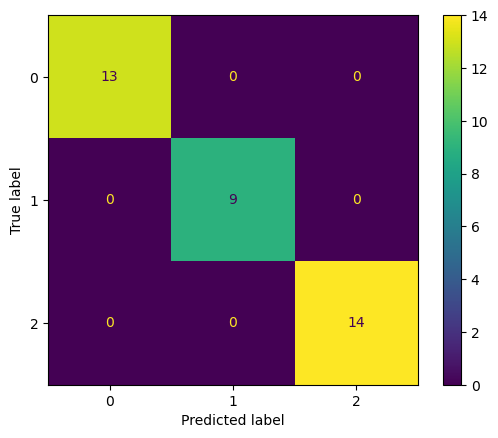

Матрица для RMSPROP с 3 скрытыми слоями


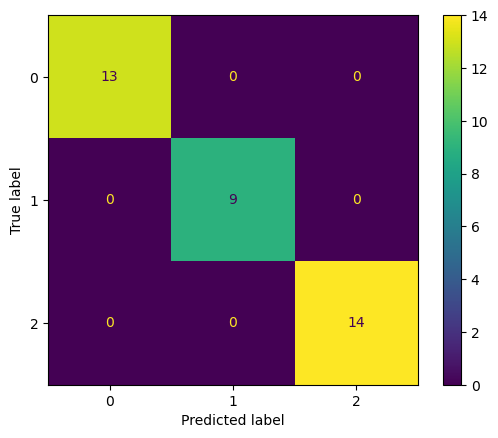

In [36]:
print("Матрица для SGD с 1 скрытым слоем")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predict1))
disp.plot()
plt.show()
print("Матрица для RMSPROP с 1 скрытым слоем")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predict2))
disp.plot()
plt.show()
print("Матрица для SGD с 3 скрытыми слоями")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predict3))
disp.plot()
plt.show()
print("Матрица для RMSPROP с 3 скрытыми слоями")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predict4))
disp.plot()
plt.show()

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
y_train=tf.keras.utils.to_categorical(y_train,3)
y_test=tf.keras.utils.to_categorical(y_test,3)
model_SGD_1_hidden.fit(x_test,y_test,epochs=20, batch_size=1, verbose=0)
model_SGD_1_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy',keras.metrics.Precision(),
keras.metrics.Recall(), tf.keras.metrics.FalsePositives(),tf.keras.metrics.TruePositives()])

model_RMSPROP_1_hidden.fit(x_test,y_test,epochs=20, batch_size=1, verbose=0)
model_RMSPROP_1_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy',keras.metrics.Precision(),
keras.metrics.Recall(), tf.keras.metrics.FalsePositives(),tf.keras.metrics.TruePositives()])

model_SGD_3_hidden.fit(x_test,y_test,epochs=20, batch_size=1, verbose=0)
model_SGD_3_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy',keras.metrics.Precision(),
keras.metrics.Recall(), tf.keras.metrics.FalsePositives(),tf.keras.metrics.TruePositives()])

model_RMSPROP_3_hidden.fit(x_test,y_test,epochs=20, batch_size=1, verbose=0) 
model_RMSPROP_3_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy',keras.metrics.Precision(),
keras.metrics.Recall(), tf.keras.metrics.FalsePositives(),tf.keras.metrics.TruePositives()])

loss_value1,accuracy_value1,precision_value1,recall_value1, false_positives_value1, true_positives_value1=model_SGD_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
loss_value1,accuracy_value2,precision_value2,recall_value2, false_positives_value2, true_positives_value2=model_RMSPROP_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
loss_value1,accuracy_value3,precision_value3,recall_value3, false_positives_value3, true_positives_value3=model_SGD_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
loss_value1,accuracy_value4,precision_value4,recall_value4, false_positives_value4, true_positives_value4=model_RMSPROP_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)

In [38]:
y_test = np.argmax(y_test, axis = 1)
print("Метрики для SGD с 1 скрытым слоем ")
print("Precision - "+ str(precision_value1)+ "\nRecall - " + str(recall_value1)+ "\nFPN - " + str(false_positives_value1) 
+ "\nTPN - "      +  str(true_positives_value1)+ "\nF1 - "+ str(f1_score(y_test,predict1, average='macro')))
print("Метрики для RMSPROP с 1 скрытым слоем ")
print("Precision - "+ str(precision_value2)+ "\nRecall - " + str(recall_value2)+ "\nFPN - " + str(false_positives_value2) 
+ "\nTPN - "      +  str(true_positives_value2) + "\nF1 - "+ str(f1_score(y_test,predict2, average='macro')))
print("Метрики для SGD с 3 скрытыми слоями ")
print("Precision - "+ str(precision_value3)+ "\nRecall - " + str(recall_value3)+ "\nFPN - " + str(false_positives_value3) 
+ "\nTPN - "      +  str(true_positives_value3)+ "\nF1 - "+ str(f1_score(y_test,predict3, average='macro')))
print("Метрики для RMSPROP с 3 скрытыми слоями ")
print("Precision - "+ str(precision_value4)+ "\nRecall - " + str(recall_value4)+ "\nFPN - " + str(false_positives_value4) 
+ "\nTPN - "      +  str(true_positives_value4)+ "\nF1 - "+ str(f1_score(y_test,predict4, average='macro')))

Метрики для SGD с 1 скрытым слоем 
Precision - 1.0
Recall - 1.0
FPN - 0.0
TPN - 36.0
F1 - 0.16810744810744813
Метрики для RMSPROP с 1 скрытым слоем 
Precision - 1.0
Recall - 1.0
FPN - 0.0
TPN - 36.0
F1 - 0.16810744810744813
Метрики для SGD с 3 скрытыми слоями 
Precision - 1.0
Recall - 1.0
FPN - 0.0
TPN - 36.0
F1 - 0.16810744810744813
Метрики для RMSPROP с 3 скрытыми слоями 
Precision - 1.0
Recall - 1.0
FPN - 0.0
TPN - 36.0
F1 - 0.16810744810744813


In [39]:
a=6
train_accuracy1=np.empty(a)
test_accuracy1=np.empty(a)
train_accuracy2=np.empty(a)
test_accuracy2=np.empty(a)
train_accuracy3=np.empty(a)
test_accuracy3=np.empty(a)
train_accuracy4=np.empty(a)
test_accuracy4=np.empty(a)

train_loss1=np.empty(a)
test_loss1=np.empty(a)
train_loss2=np.empty(a)
test_loss2=np.empty(a)
train_loss3=np.empty(a)
test_loss3=np.empty(a)
train_loss4=np.empty(a)
test_loss4=np.empty(a)
j=0.15
for i in range(0,6):
    j+=0.05
    model_SGD_1_hidden = tf.keras.Sequential()
    model_SGD_1_hidden.add(layers.Input(shape=(13,)))
    model_SGD_1_hidden.add(layers.Dropout(j))
    model_SGD_1_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_SGD_1_hidden.add(layers.Dense(3,activation='softmax'))
    model_SGD_1_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy'])
    model_SGD_1_hidden.fit(x_train,y_train,epochs=50, batch_size=1, verbose=0)
    train_loss1[i],train_accuracy1[i]=model_SGD_1_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_SGD_1_hidden.fit(x_test,y_test,epochs=50, batch_size=1, verbose=0)
    test_loss1[i],test_accuracy1[i]=model_SGD_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)
    
    model_RMSPROP_1_hidden = tf.keras.Sequential()
    model_RMSPROP_1_hidden.add(layers.Input(shape=(13,)))
    model_RMSPROP_1_hidden.add(layers.Dropout(j))
    model_RMSPROP_1_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_RMSPROP_1_hidden.add(layers.Dense(3,activation='softmax'))
    model_RMSPROP_1_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop',metrics=['accuracy'])
    model_RMSPROP_1_hidden.fit(x_train,y_train,epochs=50, batch_size=1, verbose=0)
    train_loss2[i],train_accuracy2[i]=model_RMSPROP_1_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_RMSPROP_1_hidden.fit(x_test,y_test,epochs=50, batch_size=1, verbose=0)
    test_loss2[i],test_accuracy2[i]=model_RMSPROP_1_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)

    model_SGD_3_hidden = tf.keras.Sequential()
    model_SGD_3_hidden.add(layers.Input(shape=(13,)))
    model_SGD_3_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_SGD_3_hidden.add(layers.Dropout(j))
    model_SGD_3_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_SGD_3_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_SGD_3_hidden.add(layers.Dense(3,activation='softmax'))
    model_SGD_3_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='sgd',metrics=['accuracy'])
    model_SGD_3_hidden.fit(x_train,y_train,epochs=50, batch_size=1, verbose=0)
    train_loss3[i], train_accuracy3[i]=model_SGD_3_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_SGD_3_hidden.fit(x_test,y_test,epochs=50, batch_size=1, verbose=0)
    test_loss3[i],test_accuracy3[i]=model_SGD_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)      
       

    model_RMSPROP_3_hidden = tf.keras.Sequential()
    model_RMSPROP_3_hidden.add(layers.Input(shape=(13,)))
    model_RMSPROP_3_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_RMSPROP_3_hidden.add(layers.Dropout(j))
    model_RMSPROP_3_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_RMSPROP_3_hidden.add(layers.Dense(64,activation='sigmoid'))
    model_RMSPROP_3_hidden.add(layers.Dense(3,activation='softmax'))
    model_RMSPROP_3_hidden.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop',metrics=['accuracy'])
    model_RMSPROP_3_hidden.fit(x_train,y_train,epochs=50, batch_size=1, verbose=0)
    train_loss4[i],train_accuracy4[i]=model_RMSPROP_3_hidden.evaluate(x_train,y_train,verbose=0,batch_size=1)
    
    model_RMSPROP_3_hidden.fit(x_test,y_test,epochs=50, batch_size=1, verbose=0)
    test_loss4[i],test_accuracy4[i]=model_RMSPROP_3_hidden.evaluate(x_test,y_test,verbose=0,batch_size=1)

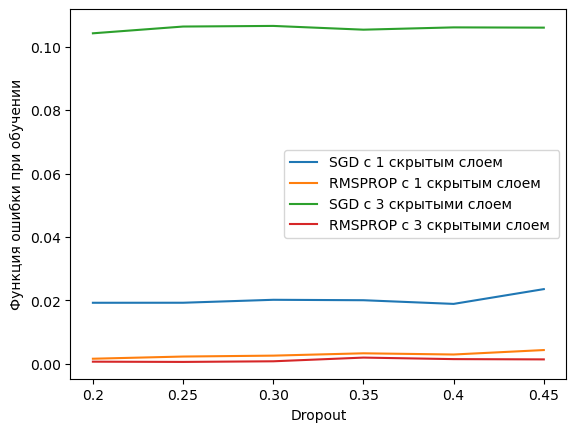

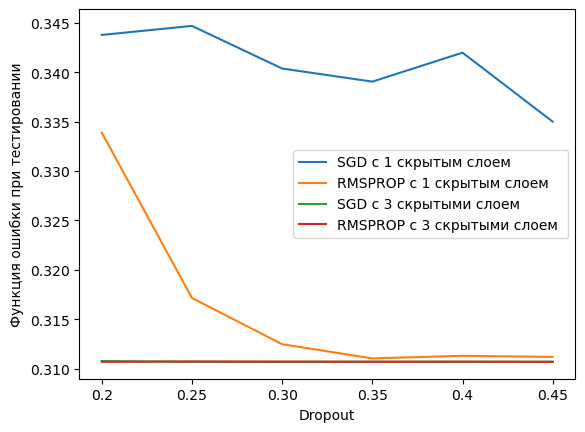

In [40]:
xaxis = ["0.2","0.25","0.30","0.35", "0.4", "0.45"]
plt.plot(xaxis,train_loss1)
plt.plot(xaxis,train_loss2)
plt.plot(xaxis,train_loss3)
plt.plot(xaxis,train_loss4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Dropout')
plt.ylabel('Функция ошибки при обучении')
plt.show()
#,'SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем '
plt.plot(xaxis,test_loss1)
plt.plot(xaxis,test_loss2)
plt.plot(xaxis,test_loss3)
plt.plot(xaxis,test_loss4)
plt.legend (('SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем '))
plt.xlabel('Dropout')
plt.ylabel('Функция ошибки при тестировании')
plt.show()

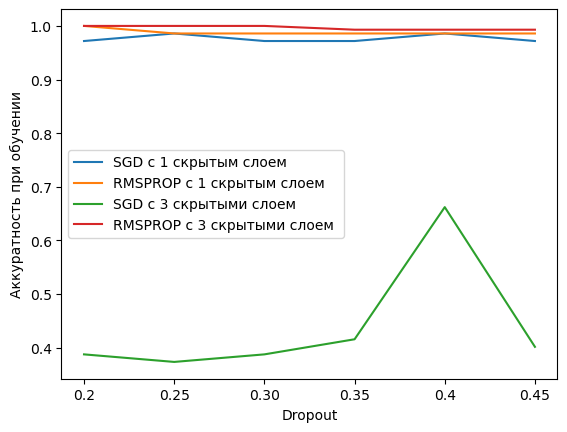

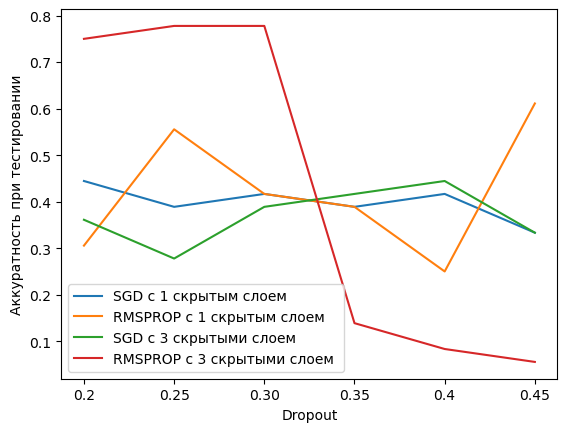

In [41]:
plt.plot(xaxis,train_accuracy1)
plt.plot(xaxis,train_accuracy2)
plt.plot(xaxis,train_accuracy3)
plt.plot(xaxis,train_accuracy4)
plt.legend (( 'SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем ' ))
plt.xlabel('Dropout')
plt.ylabel('Аккуратность при обучении')
plt.show()

plt.plot(xaxis,test_accuracy1)
plt.plot(xaxis,test_accuracy2)
plt.plot(xaxis,test_accuracy3)
plt.plot(xaxis,test_accuracy4)
plt.legend (( 'SGD с 1 скрытым слоем' ,'RMSPROP с 1 скрытым слоем ','SGD с 3 скрытыми слоем','RMSPROP с 3 скрытыми слоем '))
plt.xlabel('Dropout')
plt.ylabel('Аккуратность при тестировании')
plt.show()